In [ ]:
#-----------------Assignment-5 EDA-1------------------------!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = "C:/Users/Ashish/Downloads/Data Science Assignments/EDA1/Cardiotocographic.csv"
data = pd.read_csv(dataset_path)

data.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [81]:
#Checking for Missing Values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [95]:
# Handle missing values (example: filling with median or mean)
data.fillna(data.median(), inplace=True)

missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [87]:
# Check data types and convert if necessary
print("Data types before conversion:")
print(data.dtypes)

Data types before conversion:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [89]:
# Example: Convert columns to numeric if stored as strings
data = data.apply(pd.to_numeric, errors='coerce')

data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [91]:
# Re-check missing values after conversion
print("Missing values after type conversion:")
print(data.isnull().sum())

Missing values after type conversion:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [107]:
#2 Statistical Summary
# Calculate central tendency and dispersion for each variable
central_tendency = data.describe().loc[['mean', '50%']]  # '50%' is the median
dispersion = data.describe().loc[['std', '25%', '75%']]  # 'std' is standard deviation, '25%' & '75%' are quartiles

# Combine the two to create a more comprehensive summary
stat_summary = pd.concat([central_tendency, dispersion])

# Display the summary
print("Statistical Summary (Central Tendency & Dispersion):\n")
print(stat_summary)

Statistical Summary (Central Tendency & Dispersion):

              LB        AC        FM        UC        DL        DS        DP  \
mean  133.340204  0.003204  0.009894  0.004391  0.001895  0.000002  0.000173   
50%   133.000000  0.001634  0.000000  0.004484  0.000000  0.000000  0.000000   
std    11.214379  0.004373  0.067540  0.003340  0.003343  0.000141  0.000836   
25%   126.000000  0.000000  0.000000  0.001851  0.000000  0.000000  0.000000   
75%   140.000000  0.005606  0.002567  0.006536  0.003289  0.000000  0.000000   

           ASTV      MSTV       ALTV       MLTV       Width  Tendency  \
mean  46.995984  1.364378  10.285964   8.276147   70.395387  0.313246   
50%   49.000000  1.200000   0.000000   7.400000   67.000000  0.000000   
std   18.813973  1.173632  21.205041   7.734851   42.720508  0.643186   
25%   32.000000  0.700000   0.000000   4.600000   37.000000  0.000000   
75%   61.000000  1.700000  11.000000  10.800000  100.000000  1.000000   

           NSP  
mean  1.3

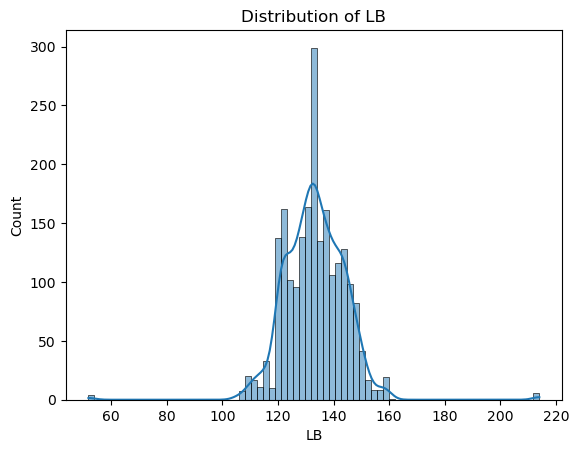

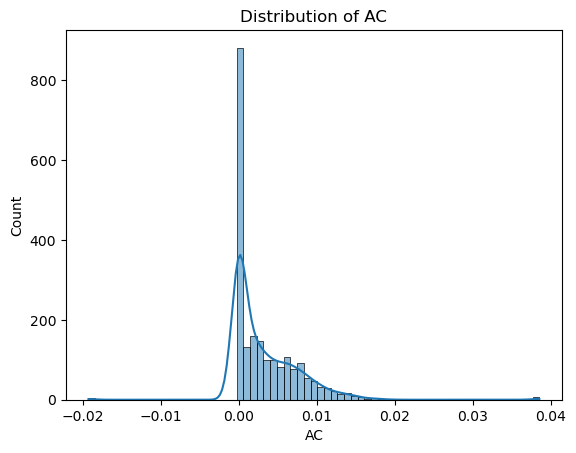

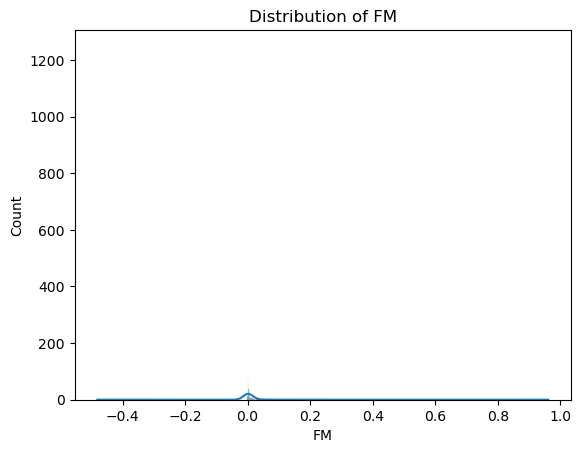

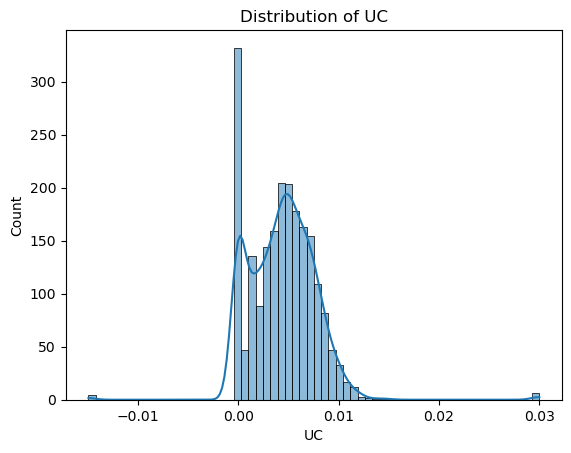

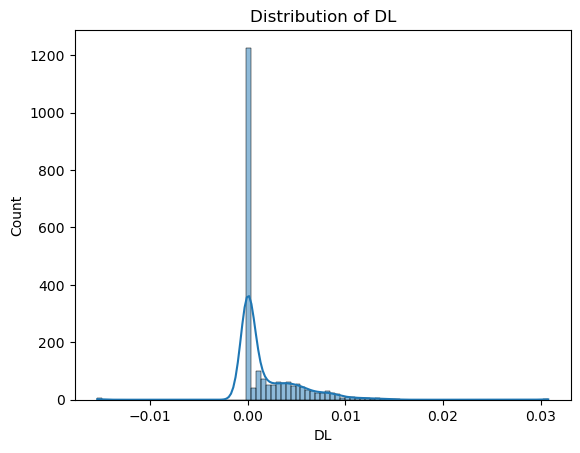

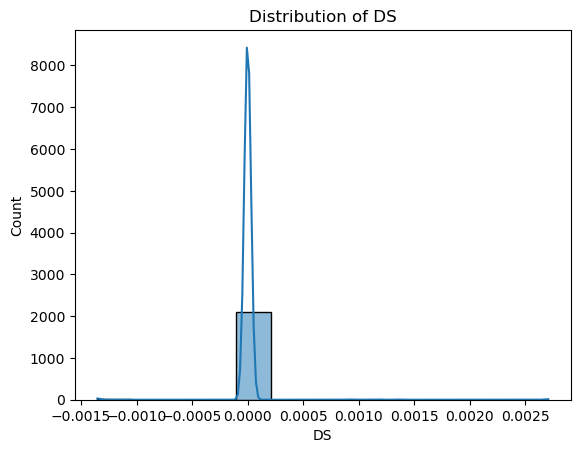

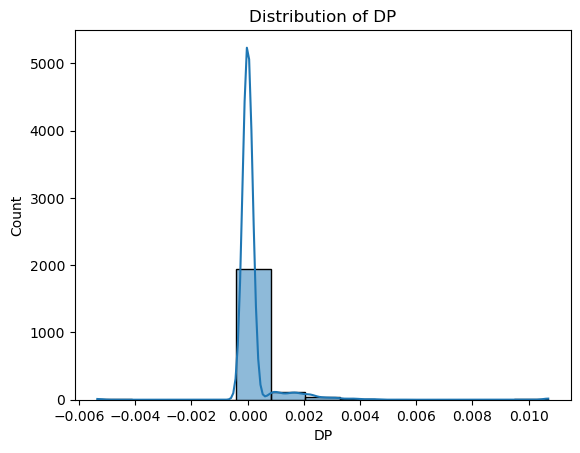

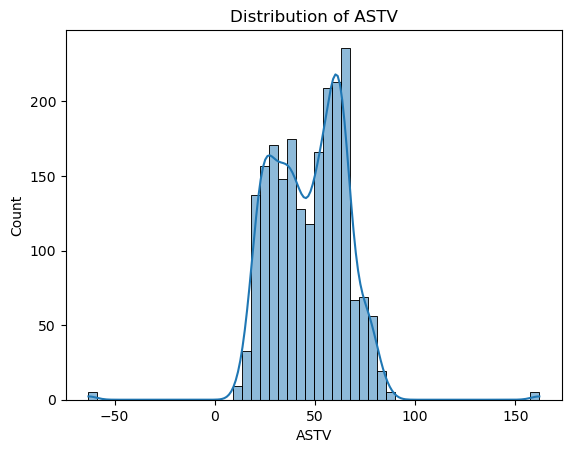

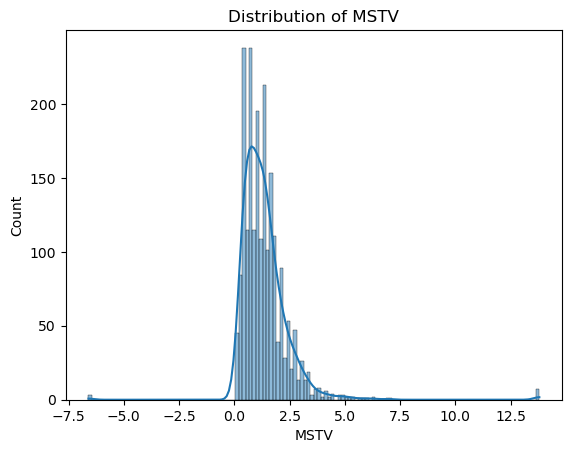

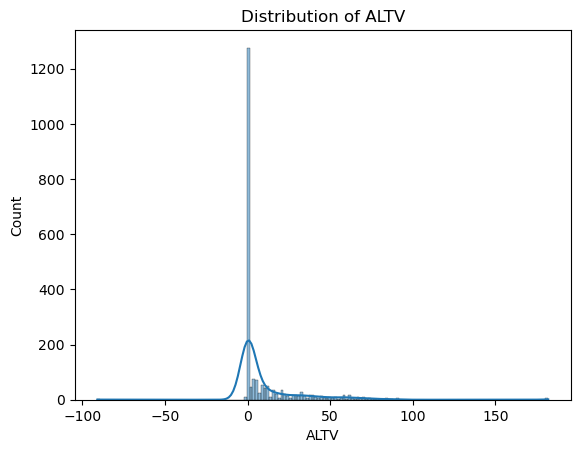

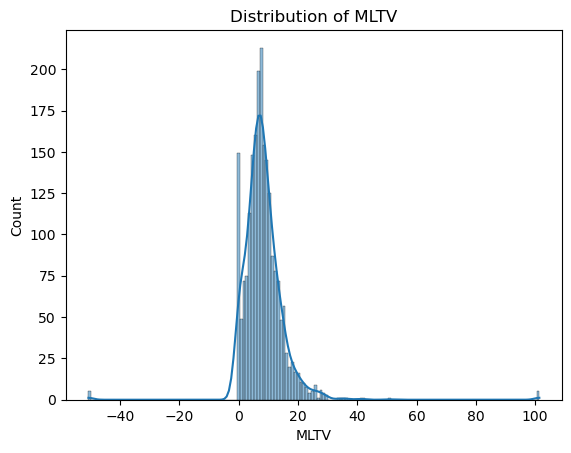

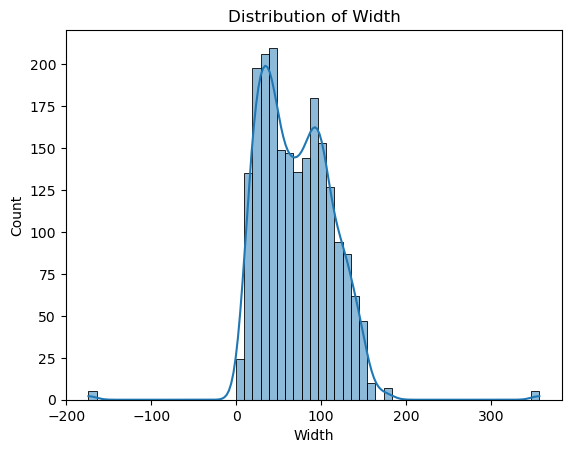

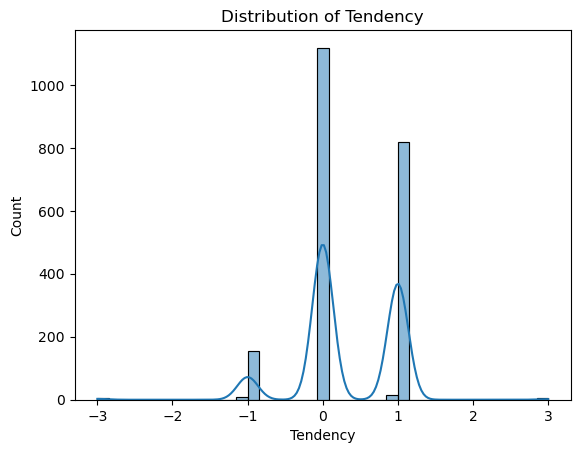

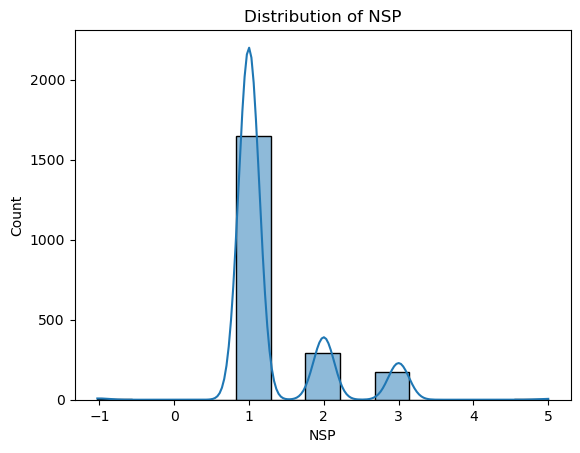

In [99]:
# 3. Data Visualization

# Histograms
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")


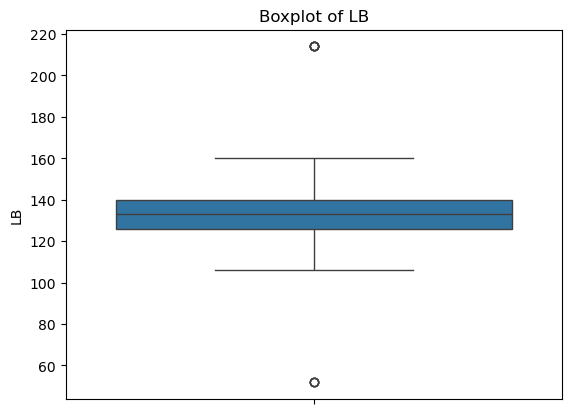

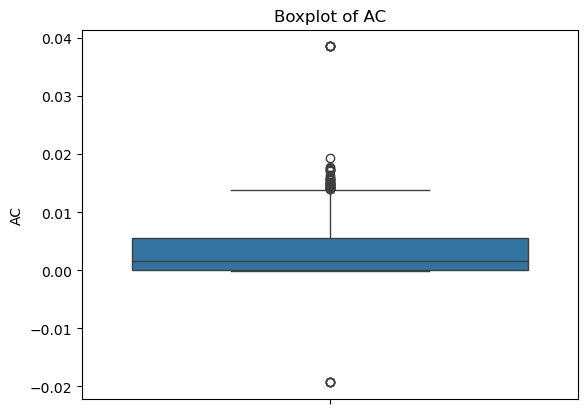

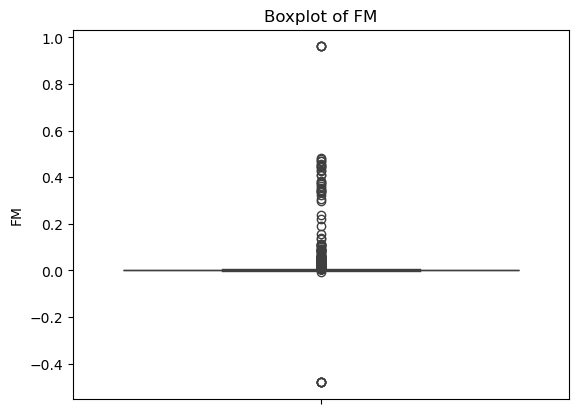

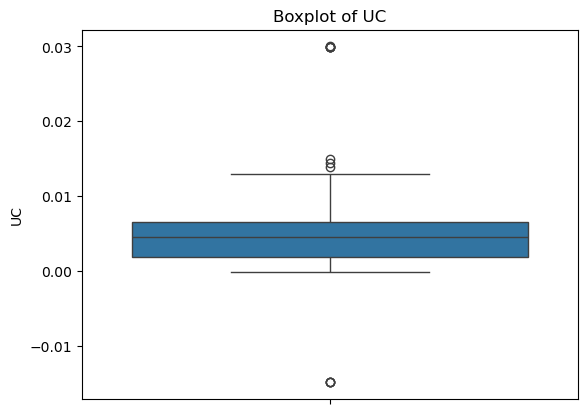

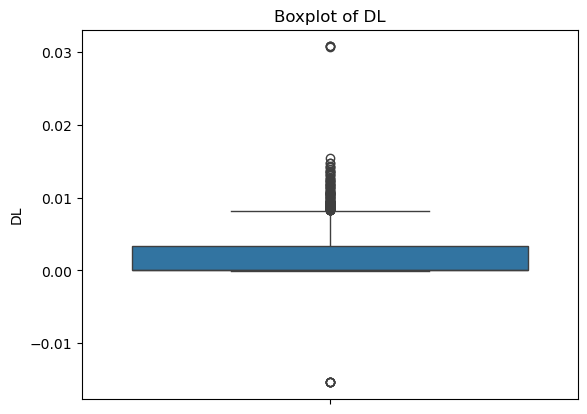

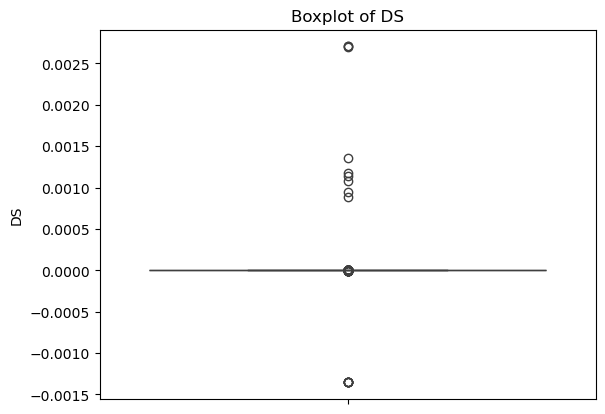

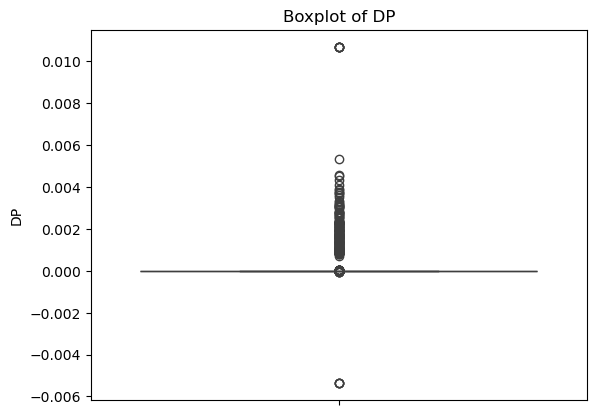

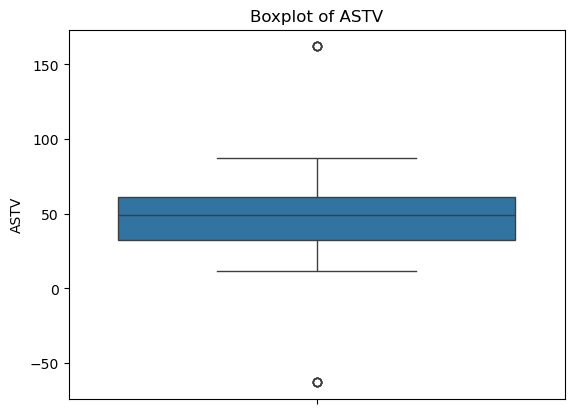

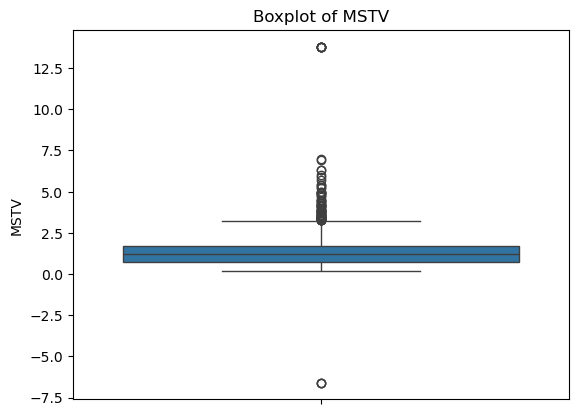

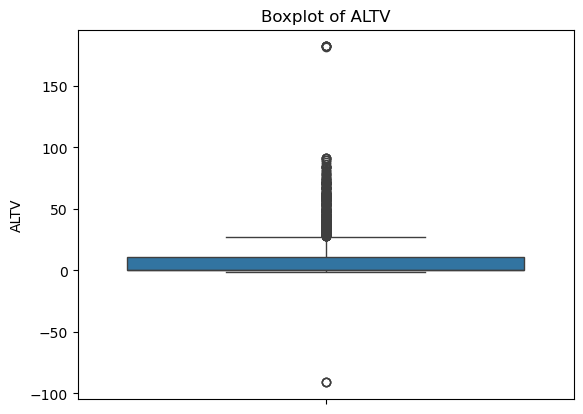

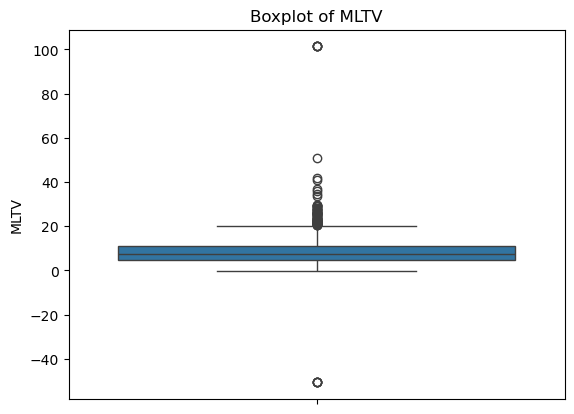

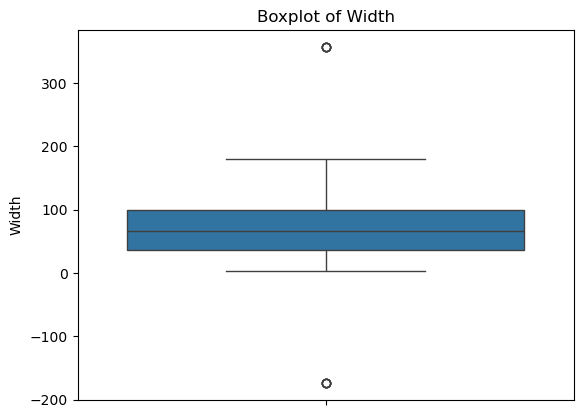

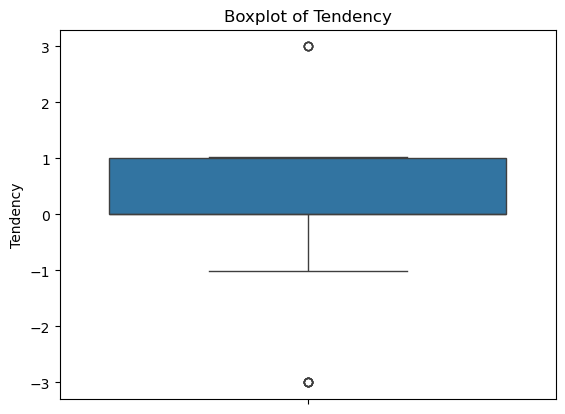

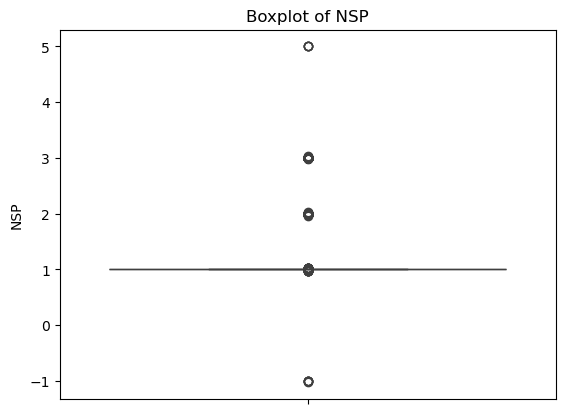

In [101]:
#Boxplots
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")


In [ ]:
# As there are no Categorical variables we cant visualize bar charts or pie charts.

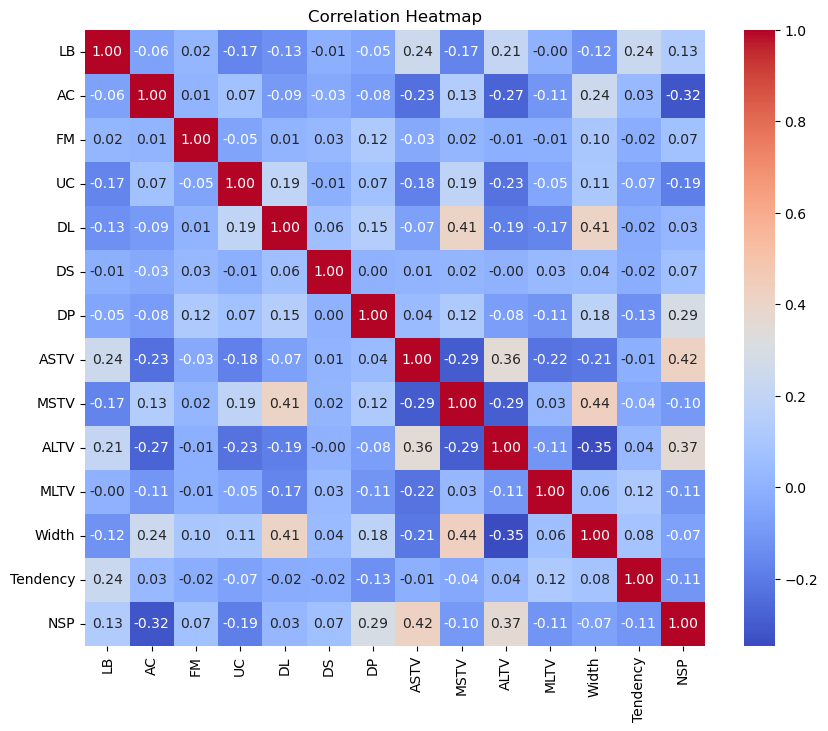

In [36]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

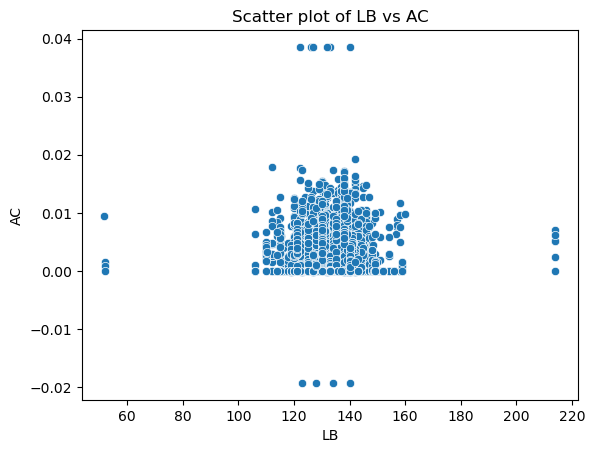

In [105]:
# Scatter Plots(example: scatter plot of LB vs AC)
plt.figure()
sns.scatterplot(x='LB', y='AC', data=data)
plt.title("Scatter plot of LB vs AC")
plt.show()

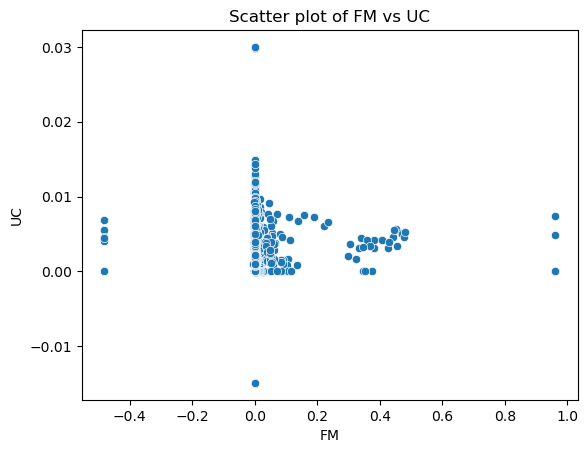

In [111]:
# Scatter plot FM vs UC
plt.figure()
sns.scatterplot(x='FM', y='UC', data=data)
plt.title("Scatter plot of FM vs UC")
plt.show()


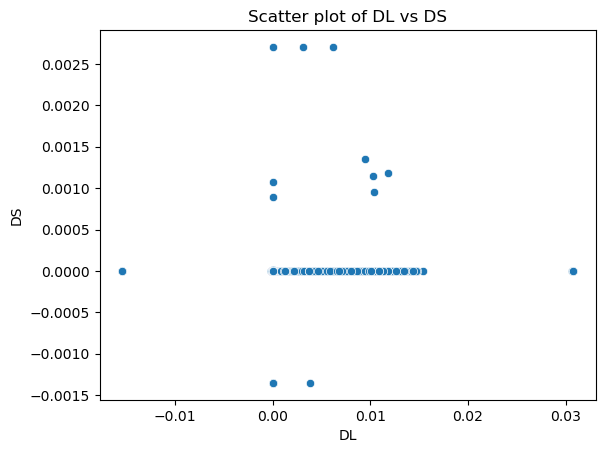

In [113]:
# Scatter plot DL vs DS
plt.figure()
sns.scatterplot(x='DL', y='DS', data=data)
plt.title("Scatter plot of DL vs DS")
plt.show()

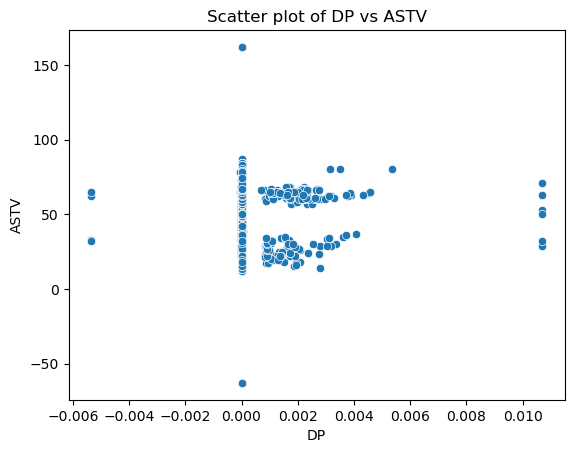

In [5]:
# Scatter plot DP vs ASTV
plt.figure()
sns.scatterplot(x='DP', y='ASTV', data=data)
plt.title("Scatter plot of DP vs ASTV")
plt.show()

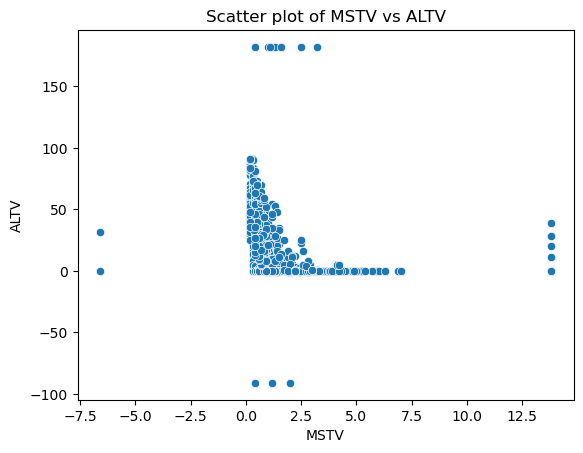

In [7]:
# Scatter plot MSTV vs ALTV
plt.figure()
sns.scatterplot(x='MSTV', y='ALTV', data=data)
plt.title("Scatter plot of MSTV vs ALTV")
plt.show()

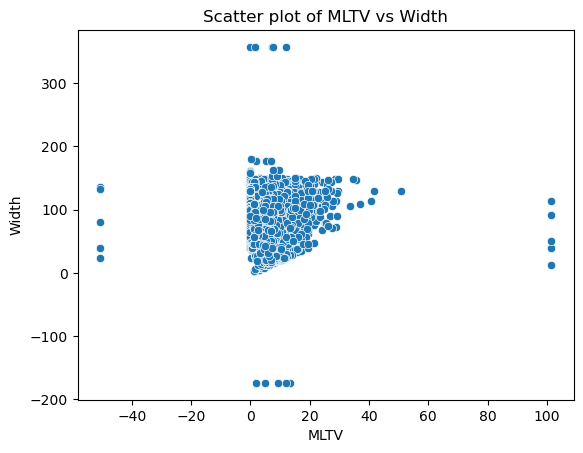

In [9]:
# Scatter plot MLTV vs Width
plt.figure()
sns.scatterplot(x='MLTV', y='Width', data=data)
plt.title("Scatter plot of MLTV vs Width")
plt.show()

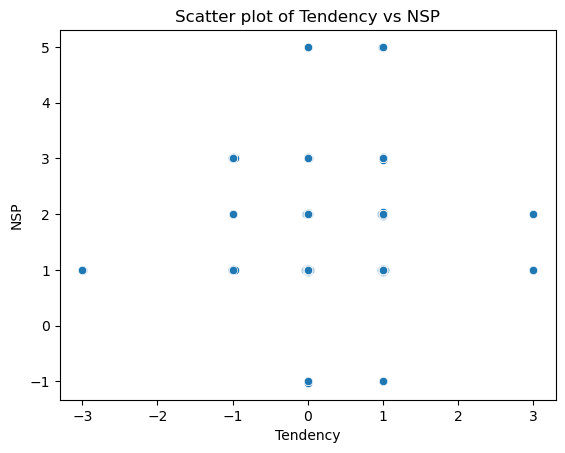

In [11]:
# Scatter plot Tendency vs NSP
plt.figure()
sns.scatterplot(x='Tendency', y='NSP', data=data)
plt.title("Scatter plot of Tendency vs NSP")
plt.show()

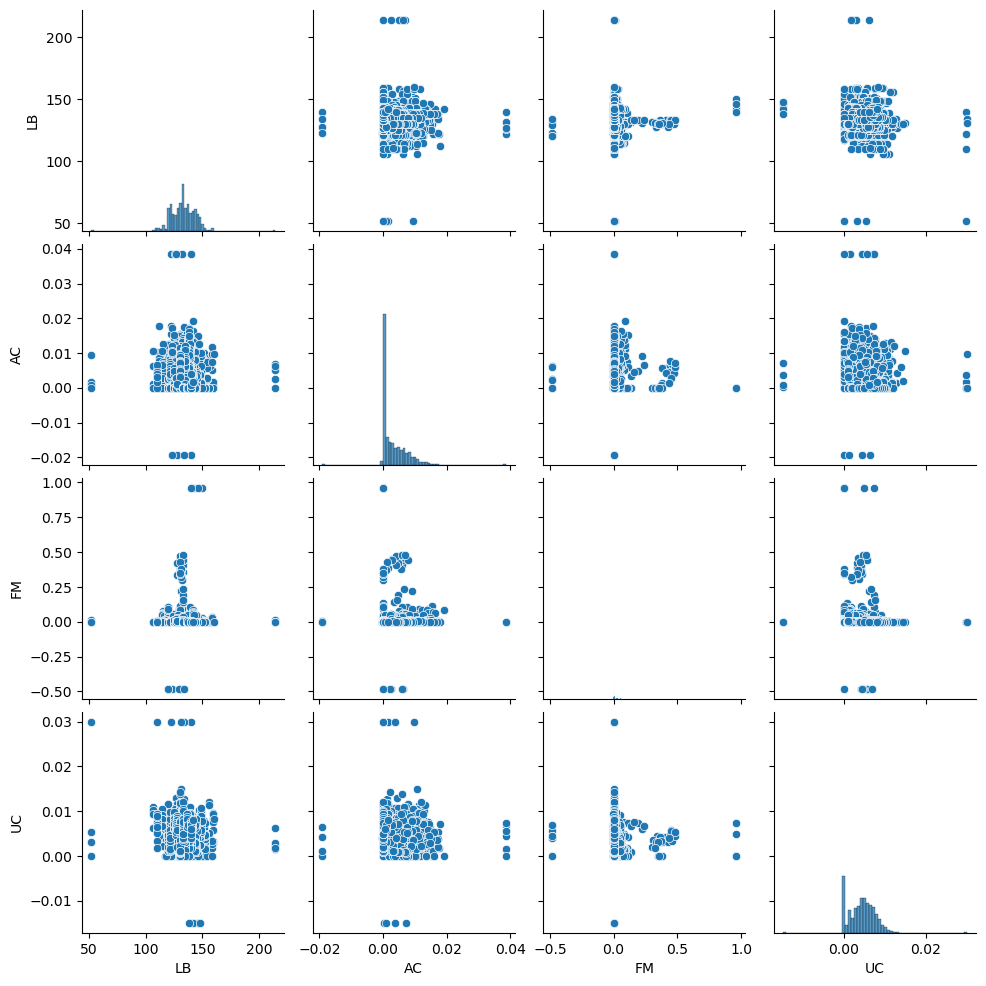

In [22]:
# Pair plot
sns.pairplot(data[['LB', 'AC', 'FM', 'UC']])
plt.show()

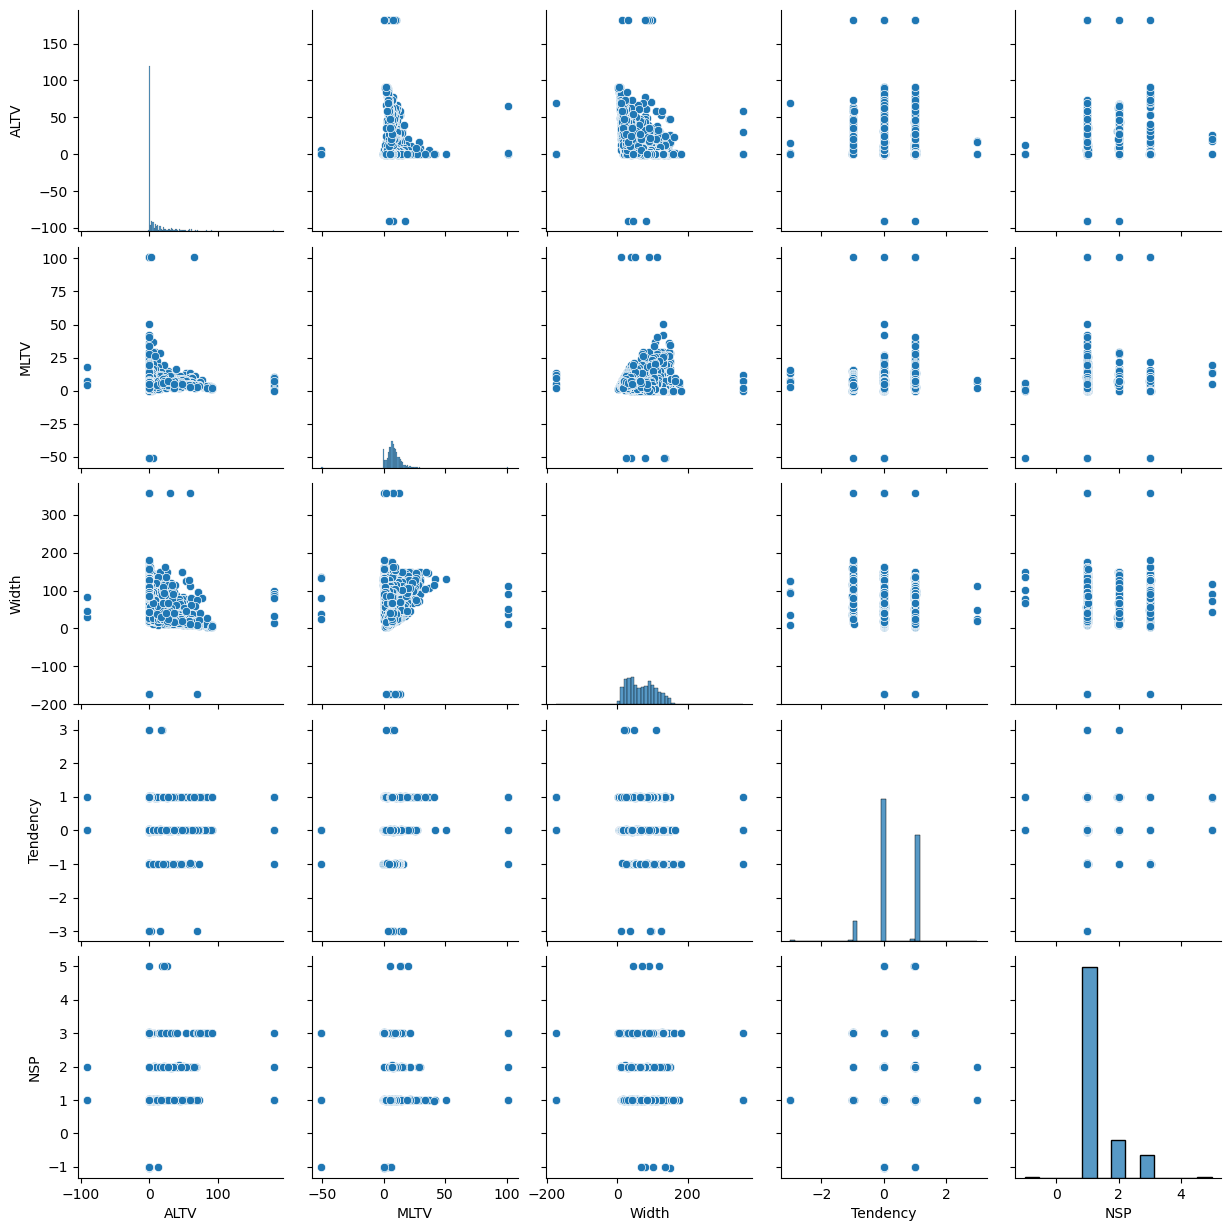

In [18]:
sns.pairplot(data[['ALTV','MLTV','Width','Tendency','NSP']])
plt.show()

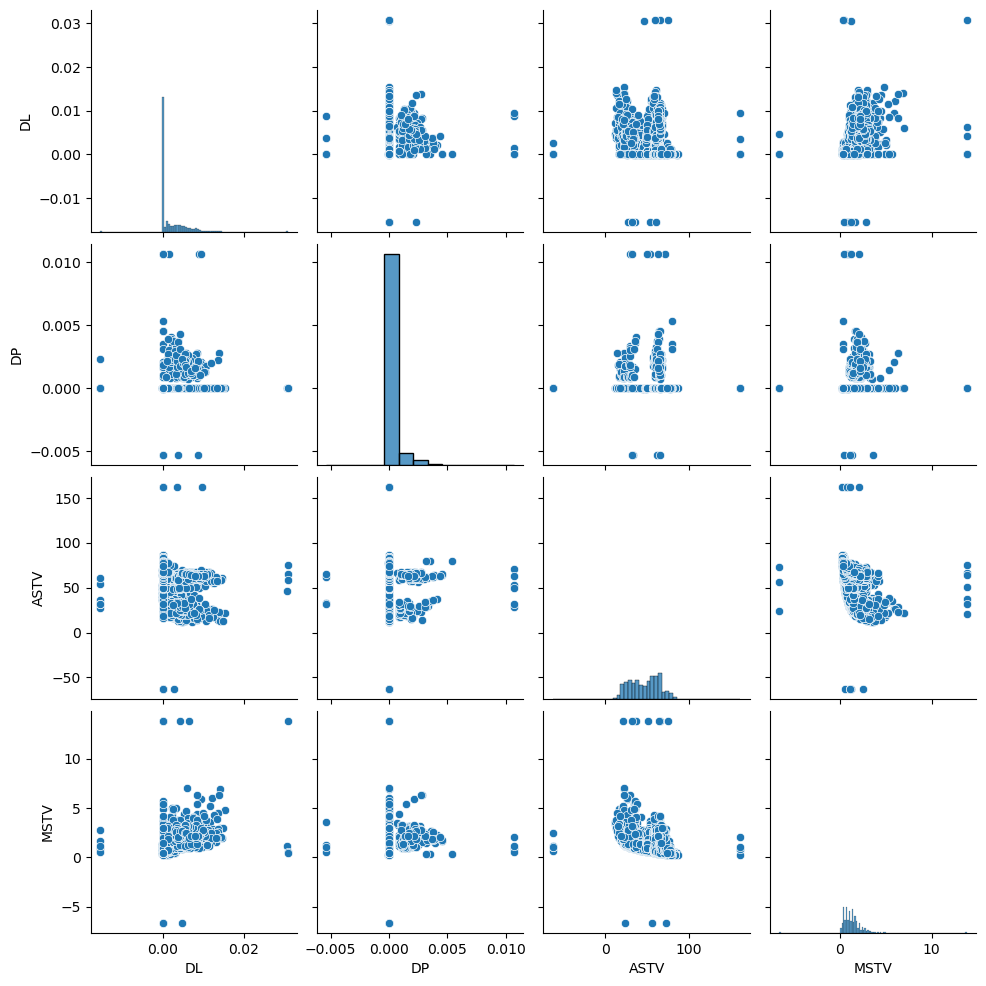

In [20]:
sns.pairplot(data[['DL','DP','ASTV','MSTV']])
plt.show()

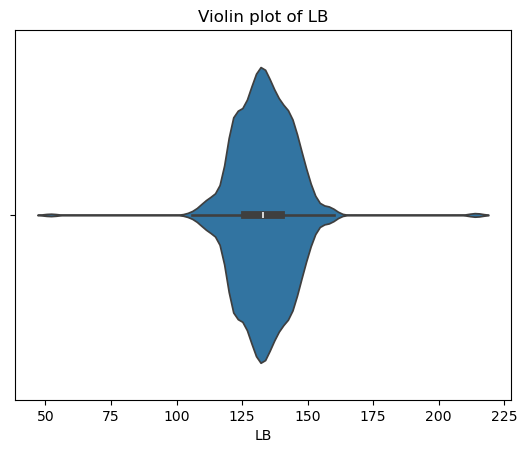

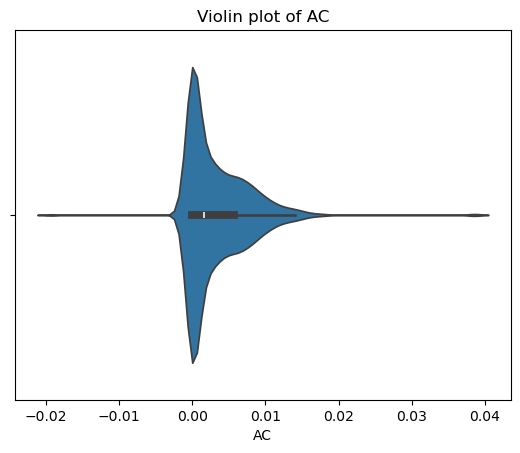

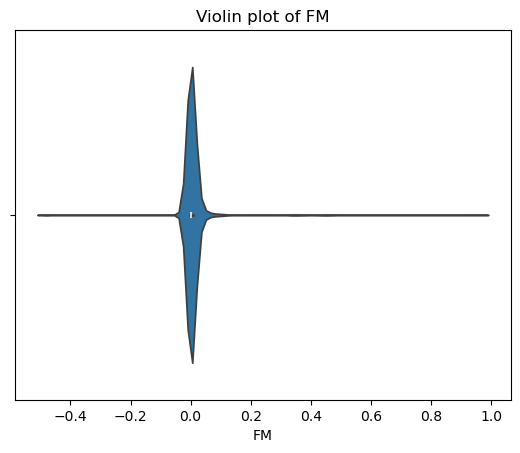

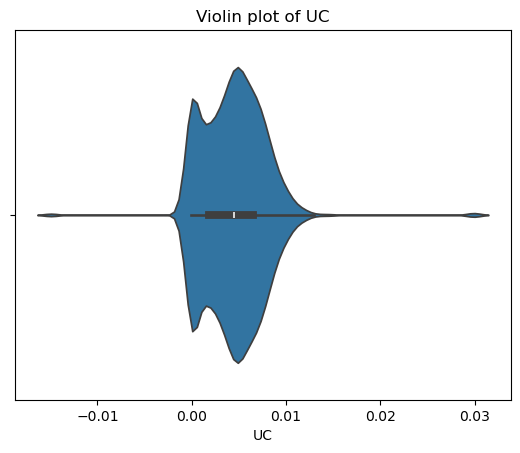

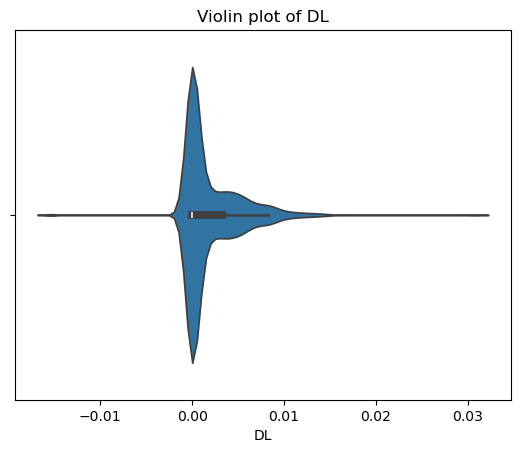

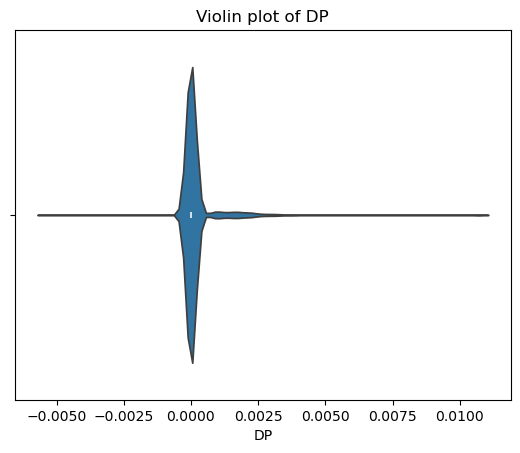

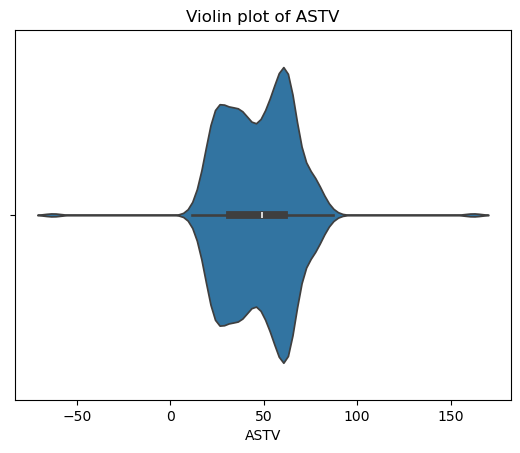

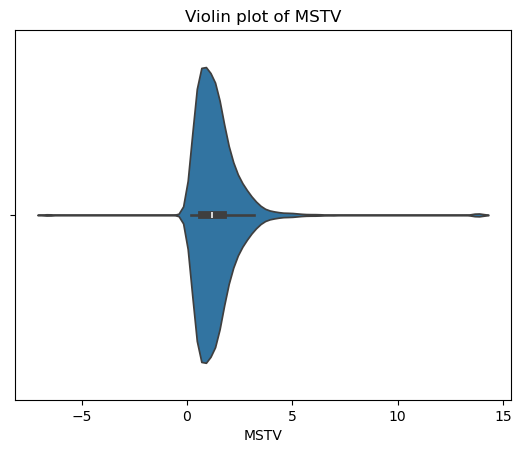

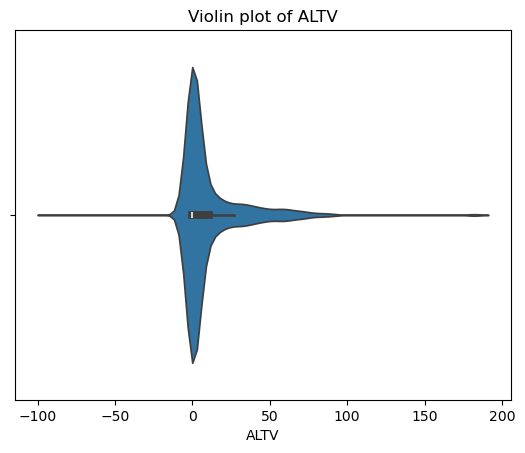

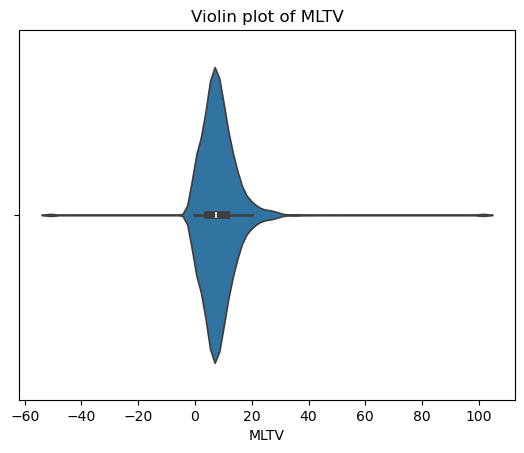

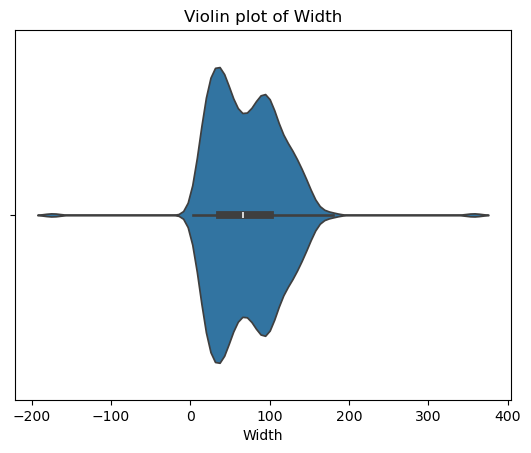

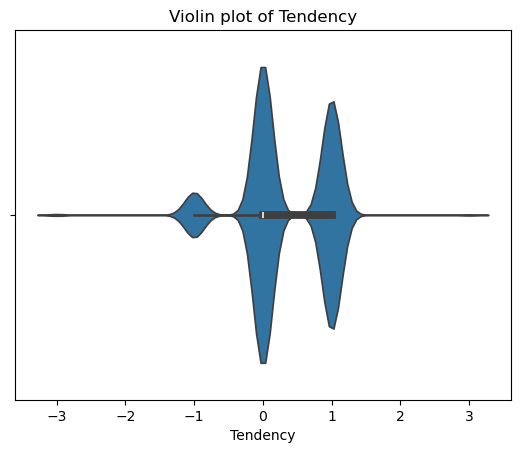

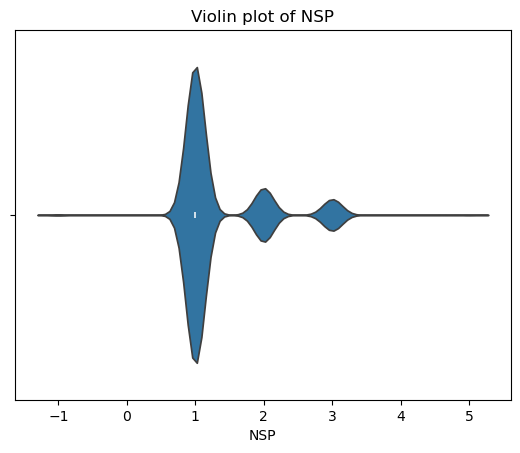

In [28]:
# Violin plots
for column in ['LB', 'AC', 'FM', 'UC','DL','DP','ASTV','MSTV','ALTV','MLTV','Width','Tendency','NSP']:
    plt.figure()
    sns.violinplot(x=data[column])
    plt.title(f"Violin plot of {column}")

In [38]:
# Discuss potential implications of correlations
threshold = 0.7  # Define a strong correlation threshold
strong_correlations = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix.abs() < 1)]
print("\nStrong Correlations (|correlation| > 0.7):")
print(strong_correlations)


Strong Correlations (|correlation| > 0.7):
          LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  Tendency  \
LB       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
AC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
FM       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
UC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DL       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DS       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DP       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ASTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MSTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ALTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MLTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    N

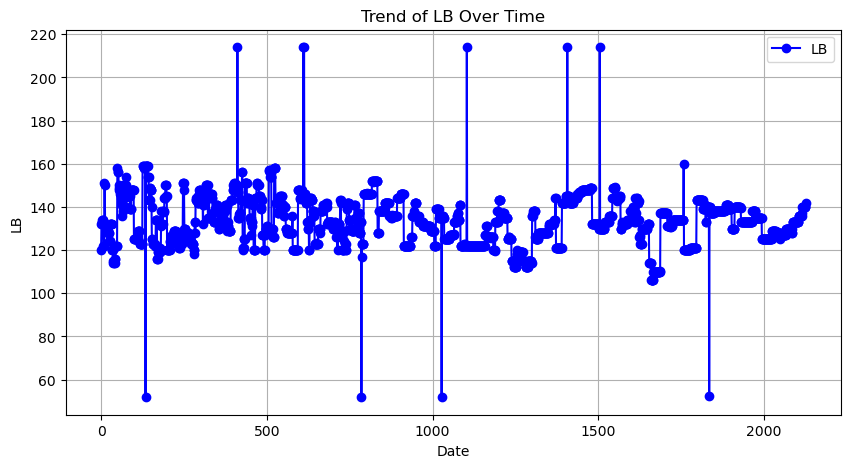

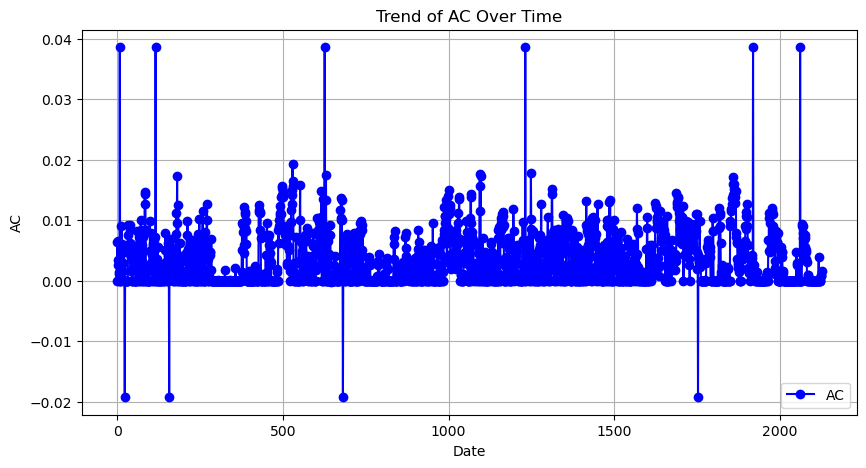

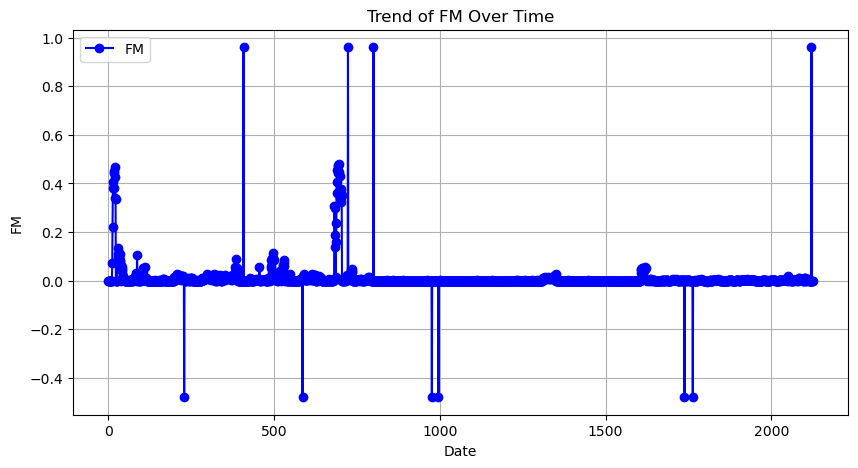

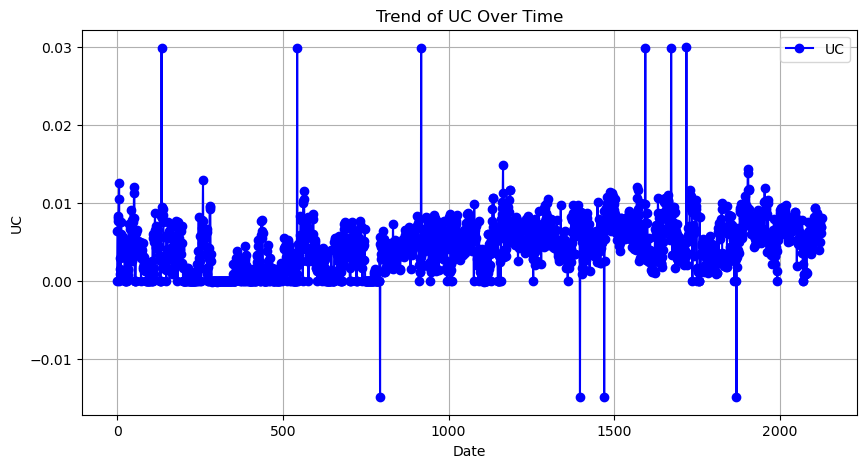

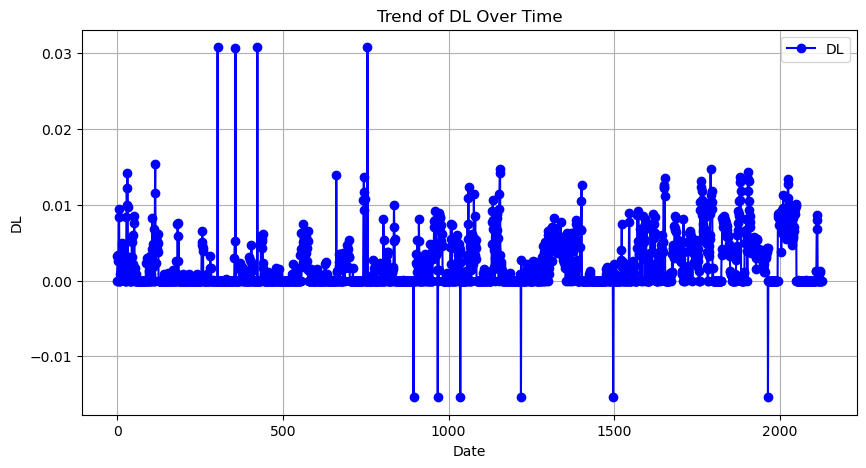

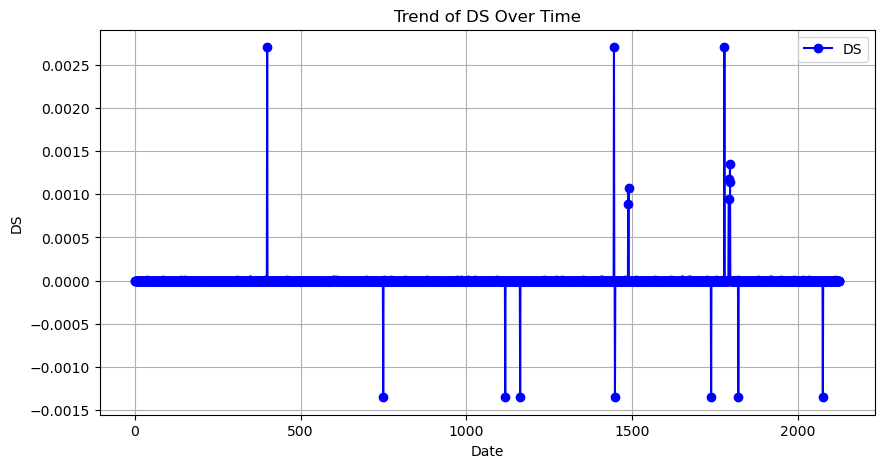

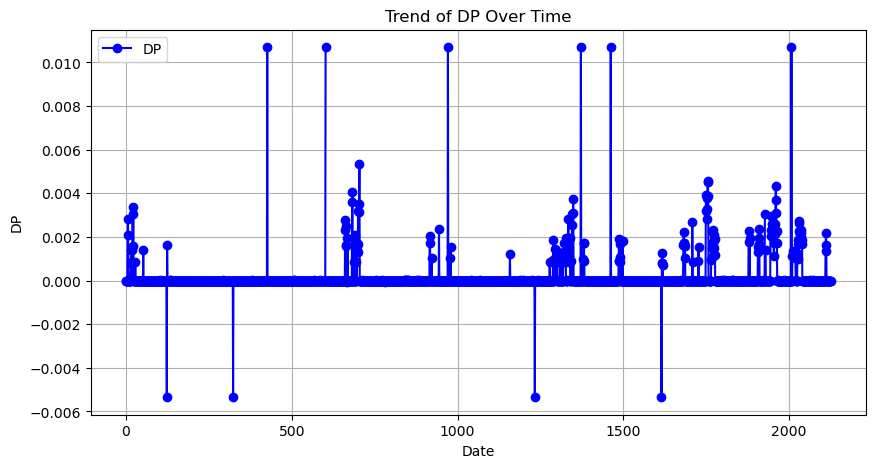

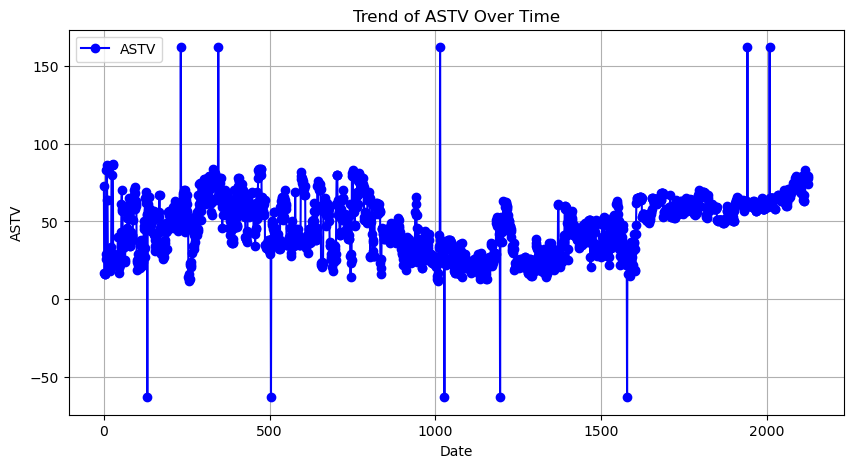

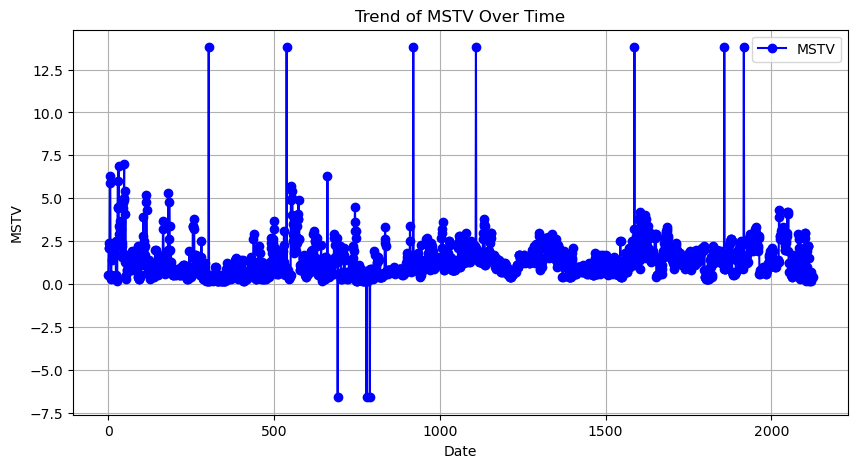

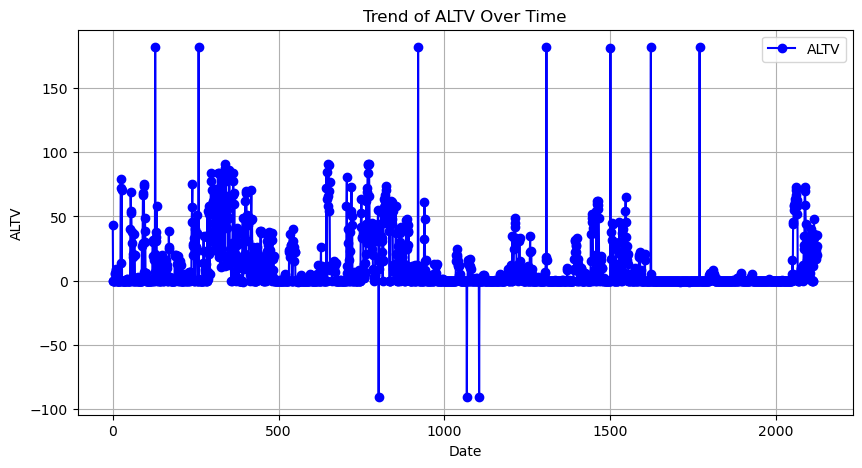

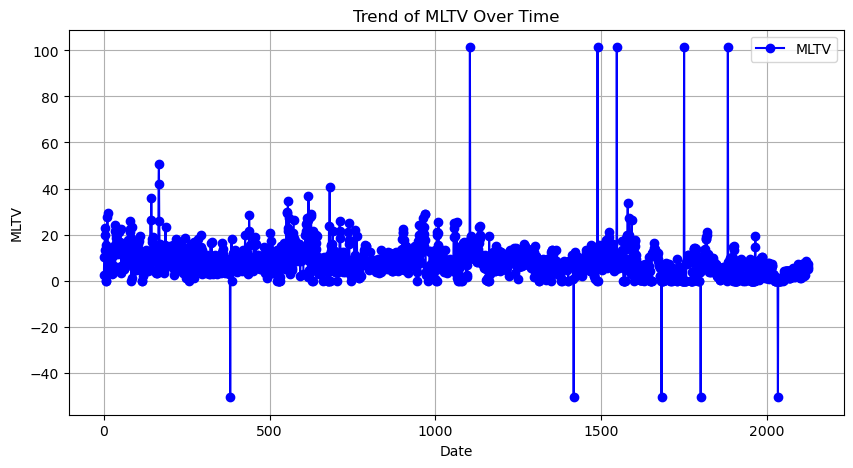

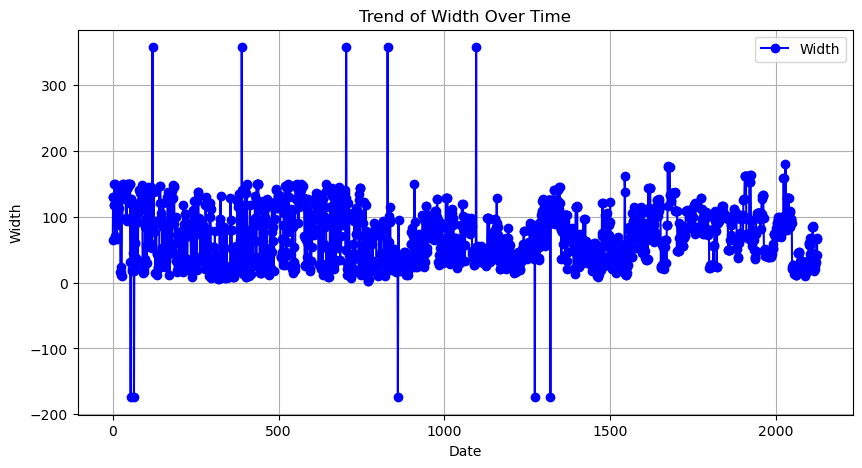

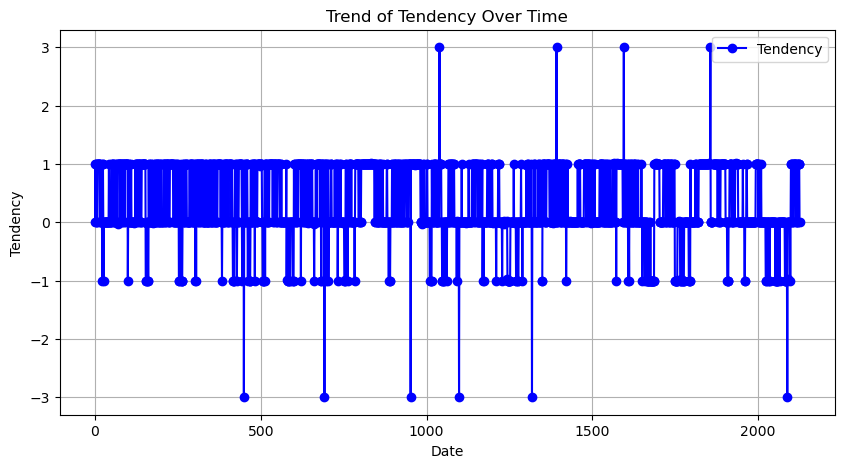

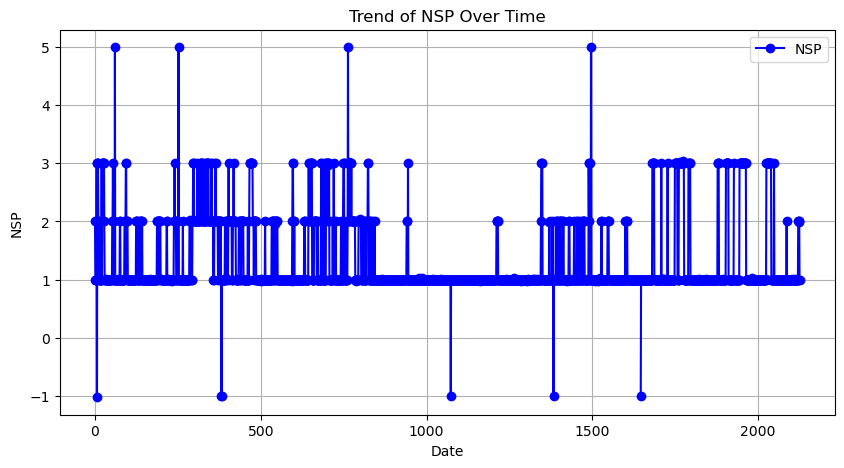

In [50]:
# Analyze trends
numerical_cols = data.select_dtypes(include=['number']).columns
for column in numerical_cols:
    plt.figure(figsize=(10, 5))
    plt.plot(data[column], label=column, marker='o', color='b')
    plt.title(f'Trend of {column} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

In [54]:
#Conclusion

#---------------Key Findings-------------------
#LB and MSTV showed a strong positive connection, suggesting that greater baseline rates are linked to larger variability.
#Possible alterations in fetal activity or monitoring circumstances are indicated by a decreasing trend in Accelerations (AC) over time.
#DP were associated with high percentages of ASTV,ALTV which may indicate fetal distress.
#Outliers in DL and UC may point to certain situations that need more research.

#----------------Implications---------------
#Strong relationships between deceleration measurements and variability measures point to important variables that medical professionals can keep an eye on in order to identify fetal distress early.
#Declines in accelerations over time may indicate that monitoring procedures need to be reviewed or environmental factors need to be looked at.
#Specific high-risk situations may be represented by outliers in uterine contraction patterns, highlighting the significance of focused interventions.

#-----------------Impact for further Analysis---------------
#On the basis of important characteristics like LB, ASTV, and UC, additional modeling could forecast results.
#Examine how fetal heart rate measurements are affected by maternal health factors, if any are available.
#To guarantee reliable analysis, deal with any missing or insufficient data that may exist.
#Investigate sophisticated clustering methods to group patients into risk profiles according to patterns of variability and deceleration.

In [ ]:
#-----------------------FINISH---------------------------!